# Spam & Ham Email Detection Project

This project is very common, but very interesting because it deals with an everyday issue and for all audiences, but also because it allows working on textual data (Cleaning + Tokenization) while using machine learning techniques for text binary classification. 

Indeed, this project aims to build a **binary email classifier** to distinguish between **Spam** and **Ham** emails.

The workflow includes:

1. **Text preprocessing and normalization**:  
   - Lowercasing, removing punctuation, URLs, email addresses, and special characters.  
   - Tokenization, removal of stopwords, and lemmatization using [NLTK](https://www.nltk.org/api/nltk.html) (`WordNetLemmatizer` and stopwords corpus).

2. **Feature extraction**:  
   - Using [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) or [TF-IDF](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) to convert text into numerical vectors.

3. **Modeling and evaluation**:  
   - Training multiple classifiers, including [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression), [Linear SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html), [Stochastic Gradient Descent](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html), and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).
   - Evaluating models using **precision, recall, and F1-score** for each class.
   - Generating a **comparison table** with multi-level columns (Ham/Spam × metrics).

The notebook demonstrates a complete pipeline from raw emails to a performance comparison of multiple classification models.

All functions used throughout this notebook, such as data loading, text cleaning, summary generation, and model evaluation, are implemented in separate scripts within this project.  
You can refer to these scripts to explore the implementation details of each function.

### 1. Packages & Data Loading

In [72]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC

from scripts import binary_clf_model, generate_post_ml_comparaison
from utils import (clean_texts, generate_email_summary,
                   generate_wordcloud_message, loading_dataset, set_plot_style)

set_plot_style()

data = loading_dataset()
data

,category,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### 2. Informations & Statistics

The function below generates information and statistics on emails from our table above.

In [74]:
tbl = generate_email_summary(data=data)
tbl

,Informations
Total number of emails,5572
Email classification categories,Spam & Ham
"% ""Spam"" emails",13.41% (747)
"% ""Ham"" emails",86.59% (4825)
"Average ""Spam"" email length (characters)",137.99
"Median ""Spam"" email length (characters)",149.00
"Standard Deviation ""Spam"" email length (characters)",29.98
"Average ""Ham"" email length (characters)",71.45
"Median ""Ham"" email length (characters)",52.00
"Standard Deviation ""Ham"" email length (characters)",58.43


The code cell below offers us a visualization of the distribution of email categories at our disposal, in other words the number and percentage of **Spam** and **Ham**.

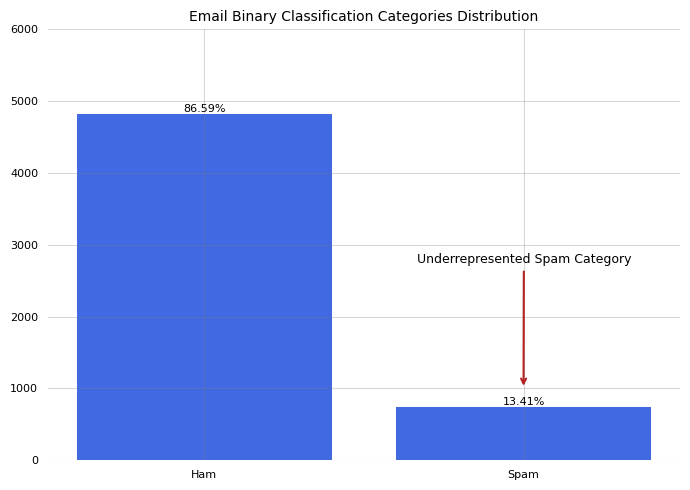

In [69]:
tbl_category = data["category"].value_counts(dropna=False)
tbl_category.index = [c.capitalize() for c in tbl_category.index]
tbl_category_pct = (tbl_category / len(data)) * 100

plt.figure(figsize=(7, 5))
plt.bar(tbl_category.index, tbl_category.values, color='royalblue')
for idx, pct in enumerate(tbl_category_pct):
    y_align = (pct / 100) * len(data)
    plt.text(idx, y_align, f"{pct:.2f}%", ha='center', va='bottom', fontsize=8)
    
spam_idx = list(tbl_category.index).index("Spam")
plt.annotate(
    "Underrepresented Spam Category",
    xy=(spam_idx, tbl_category["Spam"]+250),
    xytext=(spam_idx-0.335, tbl_category["Spam"]+2000),
    arrowprops=dict(arrowstyle="->", color="firebrick", lw=1.5),
    fontsize=9,
    color="black"
)

plt.ylim([0, 6000])
plt.title("Email Binary Classification Categories Distribution")
plt.tight_layout()
plt.show()

Below, a function offering us two wordclouds, one by email classification. The principle of these wordclouds lies in visualizing the most frequent words (appearing the most) in each email (**Spam** & **Ham**), the larger the word and the more it is present.  

To view the WordCloud documentation, click [here](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud).

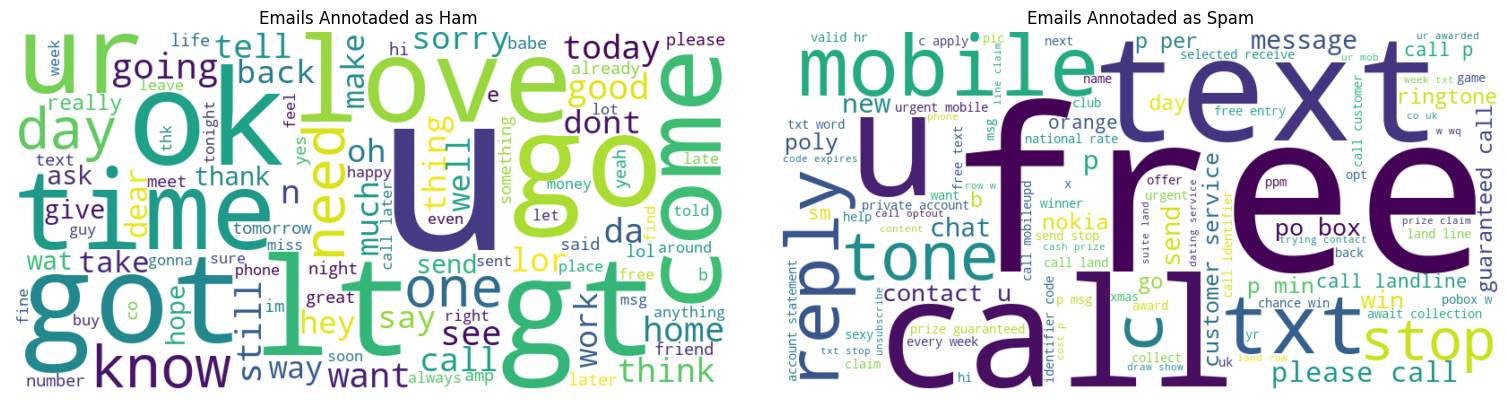

In [70]:
data["clean_message"] = data["message"].apply(clean_texts)
generate_wordcloud_message(data, text_col="clean_message", cat_col="category")

### 3. Binary Email Classification

We transform the email categories into a binary problem (`spam`=1, `ham`=0) and use the cleaned email messages as features.  
Four different classifiers are trained and evaluated: [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression), [Linear SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html), [Stochastic Gradient Descent](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html), and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).  
The classification reports are collected and summarized in a comparison table.

In [71]:
binary_categories = data["category"].unique().tolist()
assert len(binary_categories) == 2, \
    "More than 2 unique categories (not a binary problem)"

data["category"] = (data["category"] == "spam").astype(int)
X = data["clean_message"]
y = data["category"]

logistic_clf = binary_clf_model(clf_model=LogisticRegression(max_iter=1000, random_state=42),
                 text_vec=X,
                 target_vec=y)
svm_clf = binary_clf_model(clf_model=LinearSVC(C=5, max_iter=5000, random_state=42),
                 text_vec=X,
                 target_vec=y)
sgd_clf = binary_clf_model(clf_model=SGDClassifier(max_iter=1000, random_state=42),
                 text_vec=X,
                 target_vec=y)
rdf_clf = binary_clf_model(clf_model=RandomForestClassifier(random_state=42),
                 text_vec=X,
                 target_vec=y)

clf_list = [logistic_clf, svm_clf, sgd_clf, rdf_clf]
model_names = ["LogisticRegression", "LinearSVC (SVM)", "Stochastic Gradient Descent", "Random Forest"]

tbl_comparaison = generate_post_ml_comparaison(clf_list=clf_list, model_names=model_names)
tbl_comparaison

Ham                          Spam            \
                            precision    recall  f1-score precision    recall   
LogisticRegression           0.978680  0.997930  0.988211  0.984615  0.859060   
LinearSVC (SVM)              0.986626  0.992754  0.989680  0.951049  0.912752   
Stochastic Gradient Descent  0.980493  0.988613  0.984536  0.921986  0.872483   
Random Forest                0.968907  1.000000  0.984208  1.000000  0.791946   

                                       
                             f1-score  
LogisticRegression           0.917563  
LinearSVC (SVM)              0.931507  
Stochastic Gradient Descent  0.896552  
Random Forest                0.883895